In [8]:
# Ridge Regression with Hyperparameter Tuning, Cross-Validation, and Holdout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Load dataset
df = pd.read_csv("cleaned_data_more_features_filtered.csv")
X = df.drop(columns=["calories"])
y = df["calories"]

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# ------------------------
# Hyperparameter Tuning (All Features)
# ------------------------
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
mae_scores = []
rmse_scores = []

print("----- Hyperparameter Tuning Results (All Features) -----")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Alpha = {alpha}")
    print(f"  R² Score = {r2_scores[-1]:.6f}")
    print(f"  MAE = {mae_scores[-1]:.2f}")
    print(f"  RMSE = {rmse_scores[-1]:.2f}")
    print("-" * 30)

----- Hyperparameter Tuning Results (All Features) -----
Alpha = 0.0001
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 0.001
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 0.01
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 0.1
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 1
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 10
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 100
  R² Score = 0.994640
  MAE = 13.64
  RMSE = 50.67
------------------------------
Alpha = 1000
  R² Score = 0.994563
  MAE = 14.42
  RMSE = 51.03
------------------------------


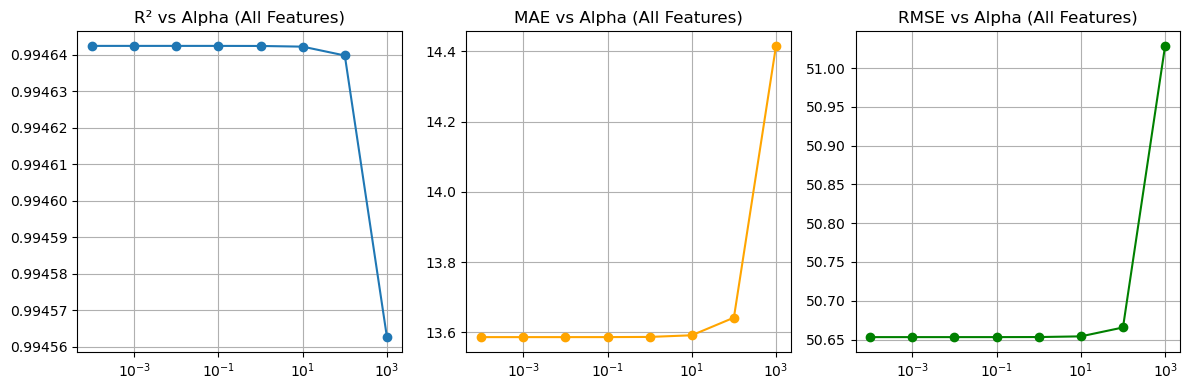

In [20]:
# -------------------- Plot Tuning Results (All Features) --------------------

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.title('R² vs Alpha (All Features)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, mae_scores, marker='o', color='orange')
plt.xscale('log')
plt.title('MAE vs Alpha (All Features)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, rmse_scores, marker='o', color='green')
plt.xscale('log')
plt.title('RMSE vs Alpha (All Features)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
#Based on what can be seen from the graphs it seems like changing alpha doesn't change the metrics significantly however
#When try to pick the best alpha we look for the highest R2^2, and lowest MAE and RMSE, for simplicity I chose alpha = 1 
# Final model with best alpha (e.g., 1)
ridge_all = Ridge(alpha=1)
start_fit_all = time.time()
ridge_all.fit(X_train, y_train)
end_fit_all = time.time()
start_score_all = time.time()
y_pred_all = ridge_all.predict(X_test)
end_score_all = time.time()

print("\n--- Ridge Regression (All Features) ---")
print("R² Score:", r2_score(y_test, y_pred_all))
print("MAE:", mean_absolute_error(y_test, y_pred_all))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_all)))
print(f"Fit Time: {end_fit_all - start_fit_all:.6f} seconds")
print(f"Score Time: {end_score_all - start_score_all:.6f} seconds")


--- Ridge Regression (All Features) ---
R² Score: 0.9946423955156476
MAE: 13.586603551099941
RMSE: 50.653188534955035
Fit Time: 0.013537 seconds
Score Time: 0.000998 seconds


In [24]:
best_alpha = 1
model_all = Ridge(alpha=best_alpha)

cv_all = cross_validate(
    model_all, X_scaled, y,
    cv=5,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
    return_train_score=True
)

cv_df_all = pd.DataFrame(cv_all)
cv_df_all["train_mae"] = -cv_df_all["train_neg_mean_absolute_error"]
cv_df_all["test_mae"] = -cv_df_all["test_neg_mean_absolute_error"]
cv_df_all["train_rmse"] = -cv_df_all["train_neg_root_mean_squared_error"]
cv_df_all["test_rmse"] = -cv_df_all["test_neg_root_mean_squared_error"]

summary_all = cv_df_all[["train_r2", "test_r2", "train_mae", "test_mae", "train_rmse", "test_rmse"]].copy()
summary_all.loc["Mean"] = summary_all.mean()

print("\n--- Cross-Validation Summary (All Features) ---")
print(summary_all)


--- Cross-Validation Summary (All Features) ---
      train_r2   test_r2  train_mae   test_mae  train_rmse    test_rmse
0     0.993889  0.992715  13.668100  14.236860   53.208160    58.458913
1     0.993362  0.994716  13.963487  13.866296   55.031195    51.279595
2     0.993541  0.994111  13.960204  13.815086   54.907338    51.789676
3     0.993492 -3.593154  13.772765  20.986541   54.491617  1511.152697
4     0.993980  0.992077  14.065309  13.612633   53.753292    56.425256
Mean  0.993653  0.076093  13.885973  15.303483   54.278320   345.821227



--- Holdout Evaluation (All Features) ---
R²: 0.9946423955156476
MAE: 13.586603551099941
RMSE: 50.653188534955035
Fit Time: 0.014042s, Score Time: 0.001006s


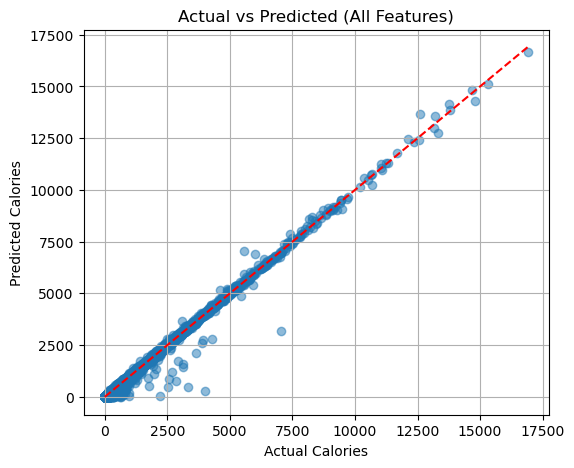

In [26]:
start_fit = time.time()
model_all.fit(X_train, y_train)
end_fit = time.time()

start_score = time.time()
y_pred_all = model_all.predict(X_test)
end_score = time.time()

print("\n--- Holdout Evaluation (All Features) ---")
print("R²:", r2_score(y_test, y_pred_all))
print("MAE:", mean_absolute_error(y_test, y_pred_all))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_all)))
print(f"Fit Time: {end_fit - start_fit:.6f}s, Score Time: {end_score - start_score:.6f}s")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_all, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted (All Features)")
plt.grid(True)
plt.show()

In [28]:
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)
top_features = X.columns[selector.get_support()]
print("\nTop 5 Selected Features:", list(top_features))

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)


Top 5 Selected Features: ['total_fat', 'sugar', 'protein', 'saturated_fat', 'carbohydrates']


In [30]:
r2_fs, mae_fs, rmse_fs = [], [], []

print("\n----- Hyperparameter Tuning (Top 5 Features) -----")
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_fs, y_train_fs)
    y_pred = model.predict(X_test_fs)

    r2_fs.append(r2_score(y_test_fs, y_pred))
    mae_fs.append(mean_absolute_error(y_test_fs, y_pred))
    rmse_fs.append(np.sqrt(mean_squared_error(y_test_fs, y_pred)))

    print(f"Alpha = {alpha}")
    print(f"  R² = {r2_fs[-1]:.6f}, MAE = {mae_fs[-1]:.2f}, RMSE = {rmse_fs[-1]:.2f}")
    print("-" * 30)


----- Hyperparameter Tuning (Top 5 Features) -----
Alpha = 0.0001
  R² = 0.994633, MAE = 13.54, RMSE = 50.70
------------------------------
Alpha = 0.001
  R² = 0.994633, MAE = 13.54, RMSE = 50.70
------------------------------
Alpha = 0.01
  R² = 0.994633, MAE = 13.54, RMSE = 50.70
------------------------------
Alpha = 0.1
  R² = 0.994633, MAE = 13.54, RMSE = 50.70
------------------------------
Alpha = 1
  R² = 0.994633, MAE = 13.54, RMSE = 50.70
------------------------------
Alpha = 10
  R² = 0.994633, MAE = 13.55, RMSE = 50.70
------------------------------
Alpha = 100
  R² = 0.994630, MAE = 13.60, RMSE = 50.71
------------------------------
Alpha = 1000
  R² = 0.994555, MAE = 14.39, RMSE = 51.06
------------------------------


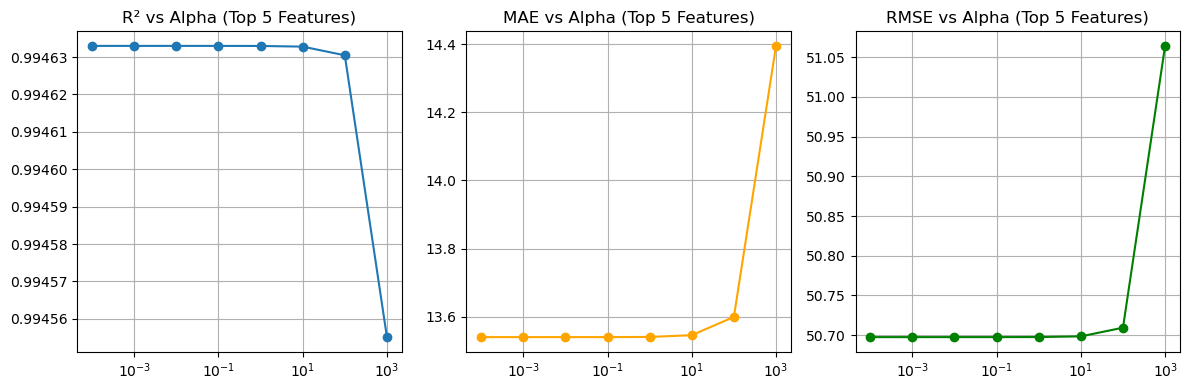

In [34]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(alphas, r2_fs, marker='o')
plt.xscale('log')
plt.title('R² vs Alpha (Top 5 Features)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, mae_fs, marker='o', color='orange')
plt.xscale('log')
plt.title('MAE vs Alpha (Top 5 Features)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, rmse_fs, marker='o', color='green')
plt.xscale('log')
plt.title('RMSE vs Alpha (Top 5 Features)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [36]:
model_fs = Ridge(alpha=best_alpha)

cv_fs = cross_validate(
    model_fs, X_selected, y,
    cv=5,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
    return_train_score=True
)

cv_df_fs = pd.DataFrame(cv_fs)
cv_df_fs["train_mae"] = -cv_df_fs["train_neg_mean_absolute_error"]
cv_df_fs["test_mae"] = -cv_df_fs["test_neg_mean_absolute_error"]
cv_df_fs["train_rmse"] = -cv_df_fs["train_neg_root_mean_squared_error"]
cv_df_fs["test_rmse"] = -cv_df_fs["test_neg_root_mean_squared_error"]

summary_fs = cv_df_fs[["train_r2", "test_r2", "train_mae", "test_mae", "train_rmse", "test_rmse"]].copy()
summary_fs.loc["Mean"] = summary_fs.mean()

print("\n--- Cross-Validation Summary (Top 5 Features) ---")
print(summary_fs)



--- Cross-Validation Summary (Top 5 Features) ---
      train_r2   test_r2  train_mae   test_mae  train_rmse  test_rmse
0     0.993879  0.992707  13.601089  14.158959   53.250358  58.492935
1     0.993351  0.994713  13.871024  13.713477   55.076860  51.296910
2     0.993531  0.994103  13.895282  13.749506   54.948099  51.825232
3     0.993471  0.994274  13.678999  13.823234   54.581502  53.356807
4     0.993972  0.992059  14.000146  13.663433   53.787465  56.489435
Mean  0.993641  0.993571  13.809308  13.821722   54.328857  54.292264



--- Holdout Evaluation (Top 5 Features) ---
R²: 0.9946329842619797
MAE: 13.54155663092139
RMSE: 50.697658114815965
Fit Time: 0.007691s, Score Time: 0.000504s


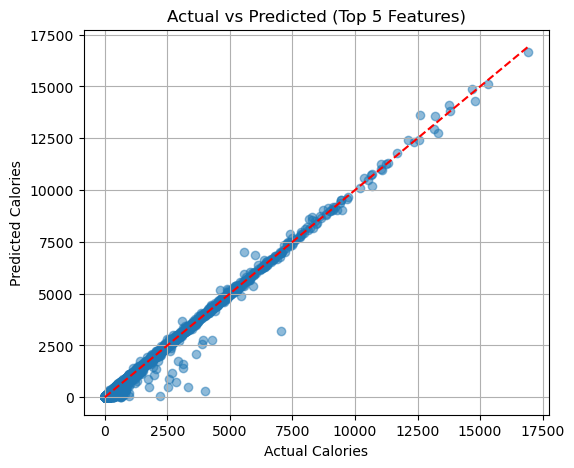

In [38]:
start_fit = time.time()
model_fs.fit(X_train_fs, y_train_fs)
end_fit = time.time()

start_score = time.time()
y_pred_fs = model_fs.predict(X_test_fs)
end_score = time.time()

print("\n--- Holdout Evaluation (Top 5 Features) ---")
print("R²:", r2_score(y_test_fs, y_pred_fs))
print("MAE:", mean_absolute_error(y_test_fs, y_pred_fs))
print("RMSE:", np.sqrt(mean_squared_error(y_test_fs, y_pred_fs)))
print(f"Fit Time: {end_fit - start_fit:.6f}s, Score Time: {end_score - start_score:.6f}s")

plt.figure(figsize=(6, 5))
plt.scatter(y_test_fs, y_pred_fs, alpha=0.5)
plt.plot([y_test_fs.min(), y_test_fs.max()], [y_test_fs.min(), y_test_fs.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted (Top 5 Features)")
plt.grid(True)
plt.show()


In [40]:
index = 0
sample_all = X_test[index].reshape(1, -1)
sample_fs = X_test_fs[index].reshape(1, -1)

pred_all = model_all.predict(sample_all)[0]
pred_fs = model_fs.predict(sample_fs)[0]
actual = y_test.iloc[index]

print("\n--- Single Sample Comparison ---")
print(f"Actual: {actual:.2f}")
print(f"Prediction (All Features): {pred_all:.2f}")
print(f"Prediction (Top 5 Features): {pred_fs:.2f}")


--- Single Sample Comparison ---
Actual: 252.80
Prediction (All Features): 253.28
Prediction (Top 5 Features): 254.55
